In [64]:
%matplotlib inline
import os,tarfile
from six.moves import urllib
DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH="datasets/housing"
HOUSING_URL=DOWNLOAD_ROOT+HOUSING_PATH+"/housing.tgz"

In [65]:
#建立目录，获得数据
def fecth_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path=os.path.join(housing_path,"housing.tgz")
    #将URL表示的网络对象复制到本地文件。如果URL指向本地文件，则对象将不会被复制，除非提供文件名
    print("get data from url....")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fecth_housing_data()

get data from url....


In [66]:
import pandas as pd
import dataframe
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)
housing=load_housing_data()
#表头信息
housing=pd.DataFrame(housing)
print(housing.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [67]:
#数据信息
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [68]:
print(housing.describe())#25%低于该值

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

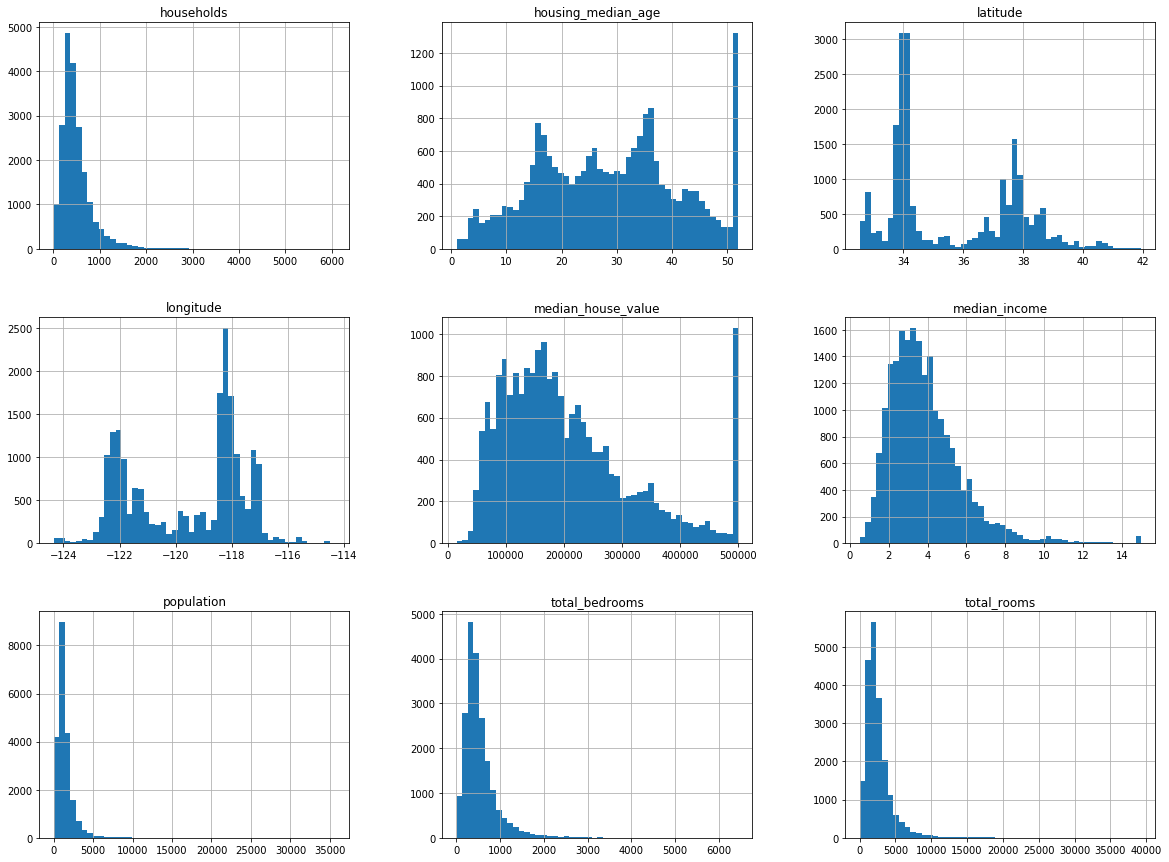

In [69]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [70]:
#split test and train
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(train_set.shape)

(16512, 10)


In [71]:
#获取收入有关信息，为了防止分类过多，将整体除以1.5之后向上去整
import numpy as np
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5.0,5.0,inplace=True)#如果满足，返回原值，否则返回Y的
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [72]:
#delete income cat
# housing.dtypes
train_set.describe

<bound method NDFrame.describe of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   
17445    -120.48     34.66                 4.0       1897.0           331.0   
14265    -117.11     32.69                36.0       1421.0           367.0   
2271     -119.80     36.78                43.0       2382.0           431.0   
17848    -121.86     37.42                20.0       5032.0           808.0   
6252     -117.97     34.04                28.0       1686.0           417.0   
9389     -122.53     37.91                37.0       2524.0           398.0   
6113     -117.90     34.13                 5.0       1126.0           316.0   
6061     -117.79     34.02                 5.0      18690.0          2862.0   
16030    -122.45     37.72                52.0        982.0           197.0   
8364     -118.35  

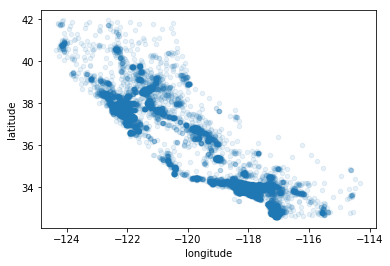

In [73]:
housing=train_set.copy()
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)#alpha 透明度

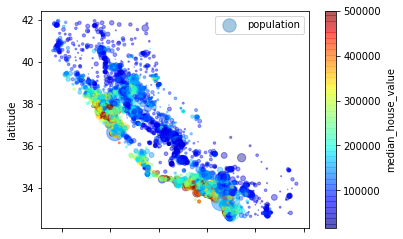

In [74]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing["population"]/100,label="population",c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)#c颜色 s半径


In [75]:
#查看相关性
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002221D5030F0>,
      dtype=object)

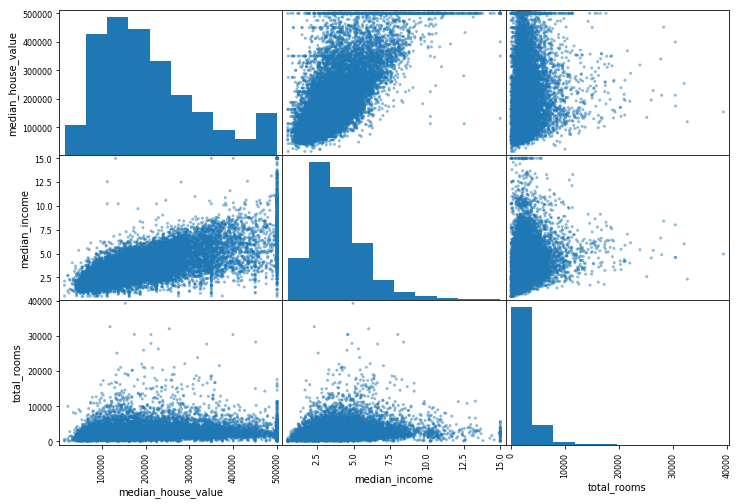

In [76]:

from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms"]
scatter_matrix(housing[attributes], figsize=(12, 8))

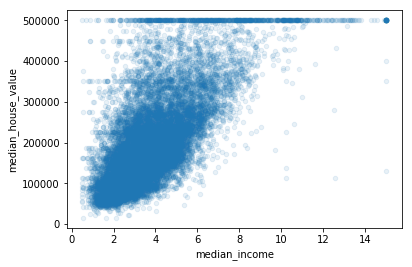

In [77]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

In [78]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_households"]=housing["population"]/housing["households"]
housing_corr=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

In [79]:
pd.core.frame.DataFrame(housing).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 13 columns):
longitude                    16512 non-null float64
latitude                     16512 non-null float64
housing_median_age           16512 non-null float64
total_rooms                  16512 non-null float64
total_bedrooms               16512 non-null float64
population                   16512 non-null float64
households                   16512 non-null float64
median_income                16512 non-null float64
median_house_value           16512 non-null float64
ocean_proximity              16512 non-null object
rooms_per_household          16512 non-null float64
bedrooms_per_room            16512 non-null float64
population_per_households    16512 non-null float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [80]:
#放弃缺失项目
housing.drop("total_bedrooms",axis=1)
print("已经放弃total_bedrooms")

已经放弃total_bedrooms


In [81]:
from sklearn.preprocessing import Imputer
imputer=Imputer(strategy="median")#中位数填充缺失值
housing_num=housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)
imputer.statistics_

E:\Jupystertry\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.12900000e+03,
        4.37000000e+02,  1.16700000e+03,  4.10000000e+02,  3.54580000e+00,
        1.79850000e+05,  5.23587365e+00,  2.02807652e-01,  2.81723971e+00])

In [82]:
housing_num.median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.12900000e+03,
        4.37000000e+02,  1.16700000e+03,  4.10000000e+02,  3.54580000e+00,
        1.79850000e+05,  5.23587365e+00,  2.02807652e-01,  2.81723971e+00])

In [83]:
#使用转换器转换
X=imputer.transform(housing_num)#返回numpy数组
housing_tr=pd.DataFrame(X,columns=housing_num.columns)
housing_tr.values

array([[-117.03      ,   32.71      ,   33.        , ...,    5.0176565 ,
           0.20057582,    3.6918138 ],
       [-118.16      ,   33.77      ,   49.        , ...,    4.47354497,
           0.23270254,    1.73809524],
       [-120.48      ,   34.66      ,    4.        , ...,    5.64583333,
           0.17448603,    2.72321429],
       ...,
       [-118.38      ,   34.03      ,   36.        , ...,    3.98671727,
           0.27082342,    3.33206831],
       [-121.96      ,   37.58      ,   15.        , ...,    6.39534884,
           0.16699301,    3.17889088],
       [-122.42      ,   37.77      ,   52.        , ...,    3.40257649,
           0.31116895,    2.10869565]])

In [84]:
#文本属性数据转换
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
housing_cat=housing["ocean_proximity"]
housing_cat_encoded=encoder.fit_transform(housing_cat)
housing_cat_encoded

array([4, 4, 4, ..., 0, 0, 3])

In [85]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [86]:
#数字标签转换为onehot格式，并在结尾转换为数组形式
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
housing_cat_onehot=encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_onehot.toarray()

E:\Jupystertry\lib\site-packages\sklearn\preprocessing\_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [87]:
#二合一转换
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer()
housing_cat_1hot=encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [88]:
#自定义转换器
housing.info()
from sklearn.base import BaseEstimator,TransformerMixin
rooms_ix,bedrooms_ix,population_ix,household_ix=3,4,5,6
class CombinedAttributeAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,x,y=None):
        return self
    def transform(self,x,y=None):
        rooms_per_household=x[:,rooms_ix]/x[:,household_ix]
        population_per_household=x[:,population_ix]/x[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_household=x[:,bedrooms_ix]/x[:,household_ix]
            return np.c_[x,rooms_per_household,population_per_household,bedrooms_per_household]
        else:
            return np.c_[x,rooms_per_household,population_per_household]

attradder=CombinedAttributeAdder(add_bedrooms_per_room=False)
housing_extra_attribute=attradder.transform(housing.values)
print(housing_extra_attribute.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 13 columns):
longitude                    16512 non-null float64
latitude                     16512 non-null float64
housing_median_age           16512 non-null float64
total_rooms                  16512 non-null float64
total_bedrooms               16512 non-null float64
population                   16512 non-null float64
households                   16512 non-null float64
median_income                16512 non-null float64
median_house_value           16512 non-null float64
ocean_proximity              16512 non-null object
rooms_per_household          16512 non-null float64
bedrooms_per_room            16512 non-null float64
population_per_households    16512 non-null float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB
(16512, 15)


In [89]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline=Pipeline([
    ('imputer',Imputer(strategy="median")),
    ('attributeadder',CombinedAttributeAdder()),
    ('std_scaler',StandardScaler()),
])
housing_num_tr=num_pipeline.fit_transform(housing_num)
print(housing_num_tr)

[[ 1.27258656 -1.3728112   0.34849025 ... -0.17491646  0.05137609
  -0.20836543]
 [ 0.70916212 -0.87669601  1.61811813 ... -0.40283542 -0.11736222
  -0.12853018]
 [-0.44760309 -0.46014647 -1.95271028 ...  0.08821601 -0.03227969
  -0.25753771]
 ...
 [ 0.59946887 -0.75500738  0.58654547 ... -0.60675918  0.02030568
  -0.03921583]
 [-1.18553953  0.90651045 -1.07984112 ...  0.40217517  0.00707608
  -0.06626528]
 [-1.41489815  0.99543676  1.85617335 ... -0.85144571 -0.08535429
  -0.08750798]]


E:\Jupystertry\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [95]:
from sklearn.pipeline import FeatureUnion
num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
from sklearn.base import TransformerMixin #gives fit_transform method for free
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)
num_pipeline=Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('imputer',Imputer(strategy="median")),
    ('attributer_adder',CombinedAttributeAdder()),
    ('std_scalar',StandardScaler()),
])
cat_pipeline=FeatureUnion([
    ('selector',DataFrameSelector(cat_attribs)),
    ('label_binarizer',MyLabelBinarizer()),
])
full_pipeline=FeatureUnion(transformer_list=[
    ("cat_pipe",cat_pipeline),
    ("num_pipe",num_pipeline),
])
housing.info()
encoder=LabelBinarizer()
housing["ocean_proximity"]=encoder.fit_transform(housing["ocean_proximity"])
print("result after label binarizer：")
housing.info()
housing_prepared=num_pipeline.fit_transform(housing)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 13 columns):
longitude                    16512 non-null float64
latitude                     16512 non-null float64
housing_median_age           16512 non-null float64
total_rooms                  16512 non-null float64
total_bedrooms               16512 non-null float64
population                   16512 non-null float64
households                   16512 non-null float64
median_income                16512 non-null float64
median_house_value           16512 non-null float64
ocean_proximity              16512 non-null int32
rooms_per_household          16512 non-null float64
bedrooms_per_room            16512 non-null float64
population_per_households    16512 non-null float64
dtypes: float64(12), int32(1)
memory usage: 1.7 MB
result after label binarizer：
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 13 columns):
longitude          

E:\Jupystertry\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [96]:
housing_prepared.shape

(16512, 15)

In [98]:
housing_labels=housing["median_house_value"]
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data["ocean_proximity"]=encoder.fit_transform(some_data["ocean_proximity"])
some_data_prepared=num_pipeline.fit_transform(some_data)
some_data_prepared.shape
print("the prediction:{}".format(lin_reg.predict(some_data_prepared)))

the prediction:[137421.14354753 430172.16366372 210425.33917665 127351.59932282
 130603.22297872]


E:\Jupystertry\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [100]:
#求方均方差损失
from sklearn.metrics import mean_squared_error
housing_prediction=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_prediction)
lin_rmse=np.sqrt(lin_mse)
lin_rmse


1.318924603853298e-10

In [101]:
#决策树
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)
housin_tree_prediction=tree_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housin_tree_prediction)
np.sqrt(lin_mse)

0.0

In [104]:
#交叉验证，分为10分，每次选取一份训练，一份测试评估
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse=np.sqrt(-scores)
print("score:{}\nmean:{}\nstandard deviation:{}".format(scores,scores.mean(),scores.std())
      )

score:[ -44288.74152542   -7693.70460048   -8667.47425803  -11744.39733495
   -7813.44639612  -10563.29497274 -131913.99273168  -14124.77286493
  -16420.35130224  -22204.72440945]
mean:-27543.490039604727
standard deviation:36308.98623577339


In [107]:
#超参测试
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid=[
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10,30],'max_features':[2,3,4]},
]
forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared,housing_labels)
print(grid_search.best_params_)
print("finish")

{'max_features': 8, 'n_estimators': 30}
finish


In [108]:
#超参完整结果
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [110]:
feature_importance=grid_search.best_estimator_.feature_importances_
feature_importance

array([1.62246095e-03, 4.17160064e-03, 2.41230701e-03, 3.28476105e-04,
       2.85816185e-04, 4.80634618e-04, 3.05774060e-04, 1.39806680e-01,
       8.11021006e-01, 2.29689657e-03, 1.48119484e-02, 6.80959773e-03,
       4.93294041e-03, 1.01561271e-02, 5.57733430e-04])

In [ ]:
extra_attribs=["room_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_onehot_attribs=list(encoder.classes_)